#Introduction - Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Part 1

In [2]:
order_df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/order.csv")
print(order_df.shape)

(49999, 12)


In [3]:
order_df.head(10)

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0
5,be5bc2f0da14d8071e2d45451ad119d9,1,fd7fd78fd3cbc1b0a6370a7909c0a629,1480000,f09b760d23495ac9a7e00d29b769007c,152000,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,e-wallet,electronics,400.0
6,0a0837a5eee9e7a9ce2b1fa831944d27,1,583916a5dae918f5e89baec139141c54,4489000,3481aa57cd91f9f9d3fa1fa12d9a3bf7,16000,4f3f778022aefa22b9f9e52d2c47edf3,delivered,2016-10-04,debit card,toys,3100.0
7,1ff217aa612f6cd7c4255c9bfe931c8b,1,33430c5c1027d812b5c62f778e5ee7f7,822000,4b1eaadf791bdbbad8c4a35b65236d52,58000,b3a9bf200375f53cc5c6991919c356fd,delivered,2016-10-04,credit card,automotive,200.0
8,22613579f7d11cc59c4347526fc3c79e,1,3ff81cd0e0861e991bb0106c03c113ca,3967000,86bb7c4b535e49a541baf3266b1c95b1,95000,53cc5d344077104b59d4f6836a90eb0b,delivered,2016-10-04,debit card,beauty,600.0
9,356b492aba2d1a7da886e54e0b6212b7,1,eba7488e1c67729f045ab43fac426f2e,4165000,620c87c171fb2a6dd6e8bb4dec959fc6,98000,68c74d748a55f9d29e6698f4b01a0df7,delivered,2016-10-04,credit card,automotive,610.0


In [4]:
order_df.describe()
#order_df.describe(include='all')
#order_df.describe(include='object')

,quantity,price,freight_value,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49980.000000
mean,1.197484,2.607784e+06,104521.390428,2201.830892
std,0.722262,1.388312e+06,55179.844962,3929.896875
min,1.000000,2.000000e+05,9000.000000,50.000000
25%,1.000000,1.410500e+06,57000.000000,300.000000
50%,1.000000,2.610000e+06,104000.000000,800.000000
75%,1.000000,3.810000e+06,152000.000000,1850.000000
max,21.000000,5.000000e+06,200000.000000,40425.000000


In [5]:
#DataFrame.loc[:,'Column_name'].mean()
#DataFrame.loc[:,'Column_name'].median()
#DataFrame.loc[:,'Column_name'].mode()
order_df.loc[:,'price'].median()

2610000.0

#Part 2

##Introduction to histogram for data distribution

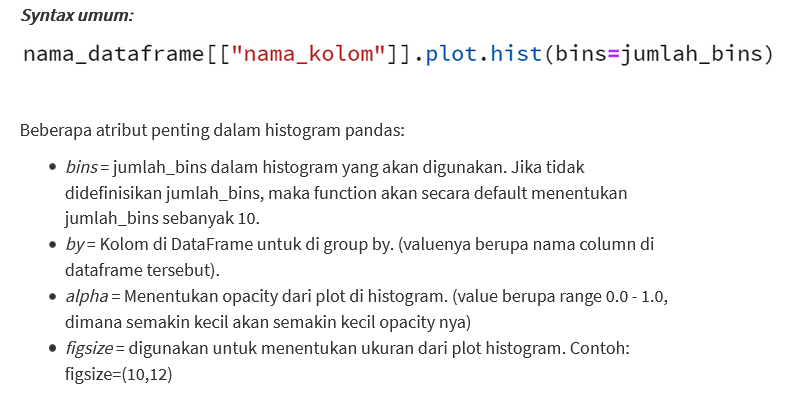

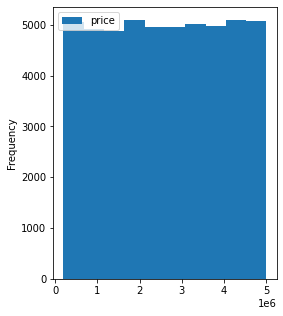

In [6]:
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
order_df[["price"]].plot.hist(figsize=(4, 5), bins=10)
plt.show()

##Standard deviation and variance

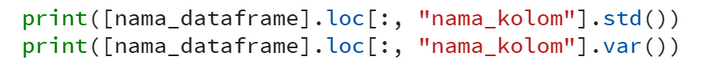

In [7]:
print(order_df.loc[:,'product_weight_gram'].std())
print(order_df.loc[:,'product_weight_gram'].var())

3929.896875372737
15444089.451064402


##Outliers

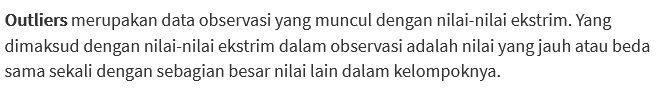
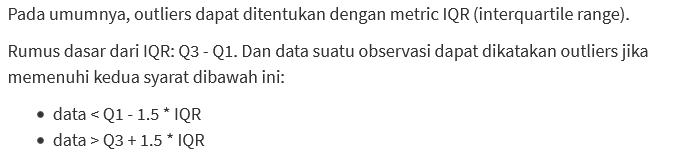

In [8]:
Q1 = order_df['product_weight_gram'].quantile(0.25)
Q3 = order_df['product_weight_gram'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

1550.0


In [9]:
#Outliers
less = order_df['product_weight_gram']<(Q1-1.5*IQR)
greater = order_df['product_weight_gram']>(Q3+1.5*IQR)
order_df[(less)|(greater)]

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
28,79ffdd52a918bbe867895a4b183d6457,1,5691a536d459e5cb326b7bedce928067,4623000,c7dcd301ecfe5ab7f778ac172cf74be7,129000,f9808148a262b51d20e2d777eee6676c,delivered,2016-10-04,virtual account,utilities,8600.0
33,a041155864e5141116458291313b35c2,1,29bedbfbe73ea473396306b4f0c010ec,4432000,5b179e9e8cc7ab6fd113a46ca584da81,187000,8fbab2ff4df1a7cc9531b14a686bb3ce,delivered,2016-10-04,credit card,toys,7600.0
35,a6475bb7a50387e3c665534e15bd40ac,1,39731b928af43b0f49dd60d4706e403f,4361000,432c67955c0acd1fd6b0b5d678766a71,158000,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04,credit card,utilities,20100.0
36,ae8a60e4b03c5a4ba9ca0672c164b181,1,a5c3ddb1a400f50d1cf7138727aec136,1425000,817f85dbb65aa3e70831d90fe75cdf89,173000,e6f959bf384d1d53b6d68826699bba12,delivered,2016-10-04,e-wallet,fashion,7811.0
42,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,4033000,b499c00f28f4b7069ff6550af8c1348a,94000,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-04,debit card,toys,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,a7cab2d2ad5de6e0bd0ede9e8d3a1322,1,90ef6790cfc145cf45f9c476d1f47af0,321000,3d871de0142ce09b7081e2b9d1733cb1,163000,cef801d1929fd81ce1cbd403b937b007,delivered,2017-12-15,debit card,electronics,6100.0
49930,a97c9b194a026ac3e75726c485f6e8ea,1,4db7441d0d2cf3d22cb4d95f87d8bf63,1925000,c003204e1ab016dfa150abc119207b24,110000,5f6db5c31f125910e26554612988efe4,delivered,2017-12-15,credit card,toys,9650.0
49980,d8eb5e8c7fc14da34fc5252a2ca7cfab,1,5ccdfc35d9cff8db4fa46b83d5712899,3724000,238fac594e170b59c6d228f5a4f4f1d9,113000,673109a1fff714fa4273743b032a9324,delivered,2017-12-15,credit card,fashion,15700.0
49985,e04d2191af862183e0ebda80377a6a32,1,e0d64dcfaa3b6db5c54ca298ae101d05,1963000,4869f7a5dfa277a7dca6462dcf3b52b2,98000,fd21c14f33f4bcdf2ac9b4073583ca64,delivered,2017-12-15,virtual account,utilities,4338.0


##Rename DataFrame Column

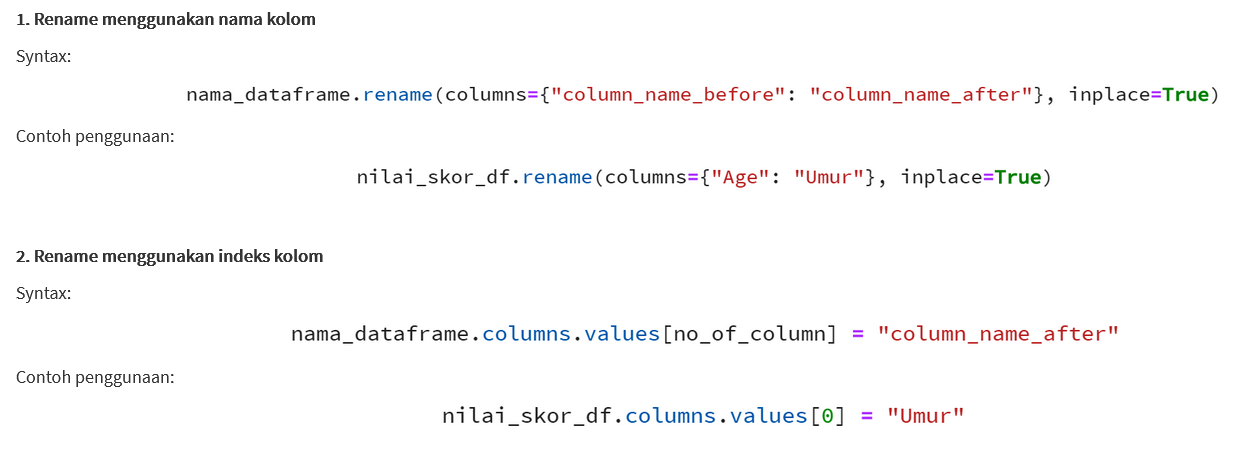

In [10]:
order_df.rename(columns={'freight_value':'shipping_cost'}, inplace=True)
order_df.head(3)

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0


##Groupby using pandas

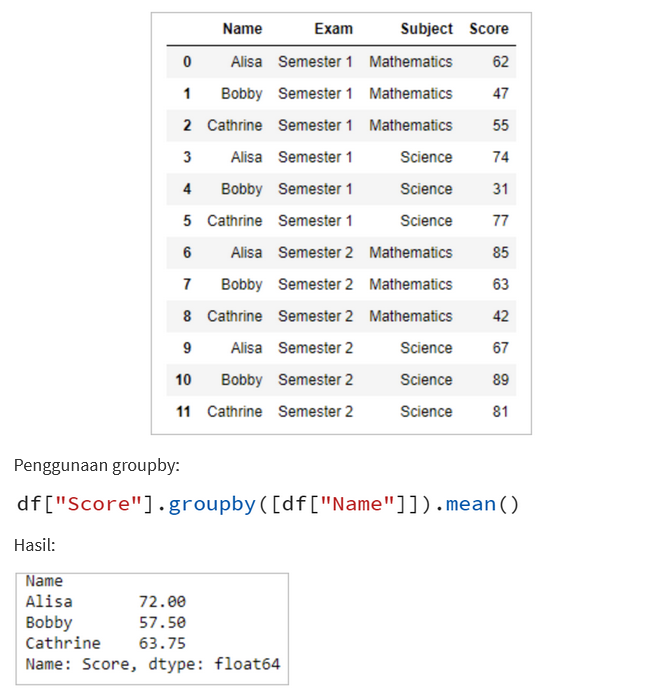

In [11]:
avg = order_df['price'].groupby(order_df['payment_type']).median()
avg

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64

##Sorting using pandas

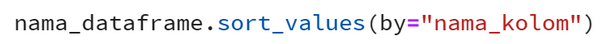

In [12]:
price_sort = order_df.sort_values(by='price', ascending=False)
price_sort

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
37085,d7b2d3b902441cf3dd12cd125533217d,1,35afc973633aaeb6b877ff57b2793310,5000000,4a3ca9315b744ce9f8e9374361493884,118000,217344c7c334e16c8e76551b4b240c1d,delivered,2017-10-31,debit card,beauty,1825.0
41958,2711089c7fec59d4dc8483e3c6a12fa3,1,7c1bd920dbdf22470b68bde975dd3ccf,5000000,cc419e0650a3c5ba77189a1882b7556a,31000,0ef59d9bb071def3dbf7e7b055965e95,delivered,2017-11-24,e-wallet,fashion,200.0
3976,f343624eab419250ad81f1ce6be22c93,1,777d2e438a1b645f3aec9bd57e92672c,5000000,4a3ca9315b744ce9f8e9374361493884,101000,3fc0d940852ab274e532e80b1c1d5c2f,delivered,2017-03-07,debit card,gadget,950.0
21072,c8947a583ab9791a5a9d02384cb84302,1,f8cfb63e323be2e1c4172f255d61843d,5000000,4a3ca9315b744ce9f8e9374361493884,184000,57c047e791e69bef0af220b0a165a22d,delivered,2017-07-27,credit card,beauty,550.0
47074,f6134169ca6f0cdfbe6458ebb5731613,1,2ea92fab7565c4fe9f91a5e4e1756258,5000000,3d871de0142ce09b7081e2b9d1733cb1,196000,cbfdcc896d6ebc83c21fdcf4f4762efc,delivered,2017-12-04,virtual account,gadget,10600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33786,0d9e86e02c1a823b20c03ea29d616607,1,f93213a23c50edc16c27b96333f734dc,200000,46dc3b2cc0980fb8ec44634e21d2718e,141000,edaad9e07395713e9f5a2124f6c846a1,delivered,2017-10-13,debit card,automotive,7550.0
42166,54220fcc516cabe9ec84b210c0765ef2,1,1166bc797ddf5fb009c376d133f61204,200000,5cbbd5a299cab112b7bf23862255e43e,175000,24e7dc2ff8c07126358af519732b8558,delivered,2017-11-24,e-wallet,gadget,1100.0
31745,59a19c83ff825948739dd1601cc107b6,1,eb38a7604070a2b8465101ed53cba72b,200000,e6a69c4a27dfdd98ffe5aa757ad744bc,112000,2bf857ee40b763708fe19cf877cac511,delivered,2017-10-01,e-wallet,beauty,550.0
42452,9960ee97c2f8d801a200a01893b3942f,1,db5efde3ad0cc579b130d71c4b2db522,200000,4869f7a5dfa277a7dca6462dcf3b52b2,26000,54af40597a8931fea3fbb2b37656fc8d,delivered,2017-11-24,credit card,automotive,6663.0


#Mini Project

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
order_df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/order.csv")

In [15]:
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

payment_type
credit card        2587500
debit card         2621500
e-wallet           2589000
virtual account    2643000
Name: price, dtype: int64


In [16]:
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
sort_value

,order_id,quantity,product_id,price,seller_id,shipping_cost,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
23829,7d63cb1d349e7bd0ee1edcc61ea71077,1,75d6b6963340c6063f7f4cfcccfe6a30,1472000,cc419e0650a3c5ba77189a1882b7556a,200000,484711e3d14ac75fb874e949b3a28395,delivered,2017-08-14,credit card,gadget,400.0
12011,00c9f7d4b0e87781465e562dc109f6aa,1,1a0d662b65b5ef08796501b064c853af,4543000,2e0dba2da448400b1c11d7b4b22f32a4,200000,cea80f9af87104810bd7fa9698f69d29,delivered,2017-05-22,e-wallet,toys,900.0
10984,69013d19f8db4cd7dc9f3b5c2564a96f,1,10d196ec072e2d8382c7ec9c942d7ea8,4137000,d12c926d74ceff0a90a21184466ce161,200000,9cf423929ed7f738fd0a0e88607a79fd,delivered,2017-05-15,credit card,utilities,250.0
29722,f32c4d2b078bc5a354f4c1184522b5ff,1,0f789be671fe3bd93cabfbb4a710f282,4802000,259f7b5e6e482c230e5bfaa670b6bb8f,200000,5a1523d32a6d1b323a05895f5164655d,delivered,2017-09-18,credit card,toys,450.0
15259,c8eab0ccabe8cdfc2afce66c1c554ae2,1,800f75019492a0d9ffb2483ae65b59f1,4078000,efcd8d2104f1a05d028af7bad20d974b,200000,2339ab3abbeebe72f2782a01c87a9bc0,delivered,2017-06-14,debit card,sports,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2891,1d0e8770169496e47622b6cbc0d10bda,1,3fc0f58c51fcd02161542e0320c4dbe7,4135000,82e0a475a88cc9595229d8029273f045,9000,e3cfff24939005d30dd3a046848227d6,delivered,2017-02-22,debit card,fashion,900.0
36815,4bff82a994068f564e54b52b08ef4512,2,24d8da2d499efba175b1092826b7e390,2879000,d12c926d74ceff0a90a21184466ce161,9000,2e998a151ac7a977d4a7e806346e0092,delivered,2017-10-30,e-wallet,fashion,150.0
8175,e6b1fa22555c3064f984ebeb8a88de77,1,6fd82d8f842424334fedf31190e54d24,2947000,6560211a19b47992c3666cc44a7e94c0,9000,02d6ca625564571402a933db8fe814f0,delivered,2017-04-21,virtual account,electronics,250.0
4034,8ac2728285fd4228f35d907768b5288a,4,fa94f25a73969e3a25d52706e246dfcc,967000,004c9cd9d87a3c30c522c48c4fc07416,9000,6b5e281c1563241783deb3a2636daa28,delivered,2017-03-08,virtual account,fashion,1700.0


In [17]:
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value)

product_category_name
automotive     2129.559039
beauty         2120.088396
electronics    2144.751191
fashion        2246.516901
gadget         2229.632942
sports         2251.879909
toys           2203.863643
utilities      2291.029868
Name: product_weight_gram, dtype: float64


In [18]:
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value)

product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
sports         4032.850044
toys           3956.814749
utilities      4150.509909
Name: product_weight_gram, dtype: float64


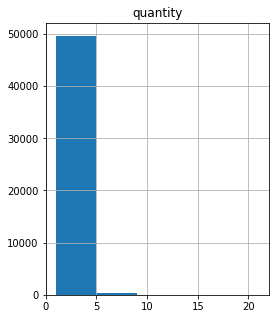

In [19]:
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()